<a href="https://colab.research.google.com/github/alvaro-barrera/phishing-detection-url/blob/main/project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción - Detección de phishing en URL's

La pandemia obligó a una digitalización masiva y en este contexto los usuarios sin experiencia han sido presa fácil de ciber-delincuentes. Múltiples son los escenarios donde se aprovecha de temores colectivos, temas de salud, políticas estatales o hacerse pasar por familiares, muchos engaños son encubiertos en mensajes donde se te pide abrir un enlace, para así obtener información personal o sensible.

El phishing hace referencia a esta modalidad de estafa, donde los se pretende extraer información de importancia, contraseñas, información de bancos o personal para cometer actos delictivos, en muchos casos no es fácil diferenciar cuándo un mensaje contiene un enlace de un sitio web legítimo y cuándo se trata de un sitio web de phishing.

Si en los últimos días has recibido mensajes que te piden que abras un enlace para acceder a distintos beneficios de las instituciones, probablemente hayas sido víctima del phishing, una modalidad que usan los cibercriminales que consiste en enviar mensajes de texto, whatsapp, correos electrónicos, entre otros haciéndose pasar por fuentes confiables para obtener tus datos personales y usarlos para hacer robos informáticos.

Esta situación permite que los atacantes cibernéticos se aprovechen de los temores colectivos y coyunturales para hacerse pasar por funcionarios de salud, engañar a las personas y así obtener información personal.

Es por esto que haciendo uso de Machine Learning evaluaremos y seleccionaremos un algoritmo de clasificación de sitios web legítimos y sitios web de phishing, con esto queremos lograr aportar una herramienta para luchar contra estas acciones maliciosas.


# Conexión a drive

In [1]:
#CONEXIÓN A DRIVE
from google.colab import drive
drive.mount('/content/drive')
#INGRESANDO A CARPETA CONTENEDORA DE ARCHIVOS EN DRIVE "ml_database"
%cd '/content/drive/My Drive/Colab Notebooks/db'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/db


#	Importación de librerías 

In [2]:
pip install python-whois

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-cp37-none-any.whl size=87704 sha256=2b816e9ce0afa7c604dc4067357e39b3ff9872d6d94837ae4b655d975aa90410
  Stored in directory: /root/.cache/pip/wheels/12/3c/9b/901b7deea1fa960f9abfd84df82414dff215c4a1d6869bcea2
Successfully built python-whois


In [3]:
#IMPORTACIÓN DE LIBRERÍAS
import pandas as pd #IMPORTACIÓN DE LIBRERIA - PANDAS
import numpy as np #IMPORTACIÓN DE LIBRERIA - NUMPY
import seaborn as sn #IMPORTACIÓN DE LIBRERIA - SEABORN
import matplotlib.pyplot as plt #IMPORTACIÓN DE LIBRERIA - MATPLOT
%matplotlib inline
#IMPORTACIÓN DE LIBRERÍA SKLEARN
from sklearn.model_selection import train_test_split  #DIVIDIR LOS DATOS DE ENTRENAMIENTO Y TEST
from sklearn.model_selection import KFold #DIVIDE UN CONJUNTO DE DATOS EN K BLOQUES - VALIDACIÓN Y ENTRENAMIENTO
from sklearn.model_selection import cross_val_score #EVALUAR NUESTRO MODELO USANDO EL ESQUEMA DE VALIDACIÓN CRUZADA
from sklearn.preprocessing import MinMaxScaler #POR DEFECTO USA VALORES ENTRE 0-1
from sklearn.preprocessing import StandardScaler 
#IMPORTACIÓN DE MODELOS SKLEARN PARA REALIZAR CLASFICACIONES
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

#TRATAMIENTO DE ARCHIVOS
from google.colab import files #DESCARGAR ARCHIVOS
from datetime import datetime #MANIPULAR FECHAS DATATIME
import time
from sklearn.pipeline import Pipeline #AUTOMARIZAR FLUJO DE TRABAJO
import joblib #GUARDAR FLUJO DE TRABAJO
#IMPORTACIÓN DE MÉTRICAS SKLEARN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#IMPORTACIÓN DE GridSearchCV PARA OPTIMIZACIÓN
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
#IGNORAR ALERTAS
import warnings
warnings.filterwarnings('ignore')
#TRATAMIENTO DE URL's
from urllib.parse import urlparse
import ipaddress
import re
import requests
from bs4 import BeautifulSoup
from googlesearch import search
import whois


# Conjuntos de datos para la detección de sitios web de phishing


## Breve descripción del conjunto de datos:



- Número total de instancias: 58,645
- Número de instancias de sitios web legítimos (etiquetadas como 0): 27,998
- Número de instancias de sitios web de phishing (etiquetadas como 1): 30,647

In [4]:
#CARGA DE ARCHIVO .CSV 
dataset = pd.read_csv('dataset_small.csv',
                      sep=',', #DEFINIENDO SEPARADOR ',' PROPIO DE .CSV
                      encoding='utf-8', #CODIFICACIÓN UTF-8
                      na_values=' ')

## Matriz de correlación al dataset original

In [5]:
dataset.corr(method='pearson') # Matriz de correlación

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.097781,0.119611,0.230117,0.416628,0.503372,0.168633,0.559617,0.001702,-0.001502,0.025278,0.040335,0.019168,-0.003099,0.000947,0.010218,0.054215,0.412330,0.454406,0.461456,0.035055,0.001851,NaN,NaN,NaN,0.002006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152756,0.280986,0.058988,0.019740,...,0.119991,0.119991,0.028961,0.099552,0.724009,0.236077,0.240869,0.301098,0.452800,0.492980,0.410917,0.581193,0.358565,0.360588,0.361545,0.355627,0.351349,0.360745,0.361316,0.361945,0.174251,0.399878,0.422435,0.415295,0.335803,0.011160,-0.006057,0.004815,-0.024738,-0.058713,-0.049259,-0.030655,-0.045841,0.051002,-0.066587,-0.049028,-0.006565,-0.004649,-0.066927,0.140542
qty_hyphen_url,0.097781,1.000000,0.201111,0.266752,0.053262,0.156433,0.033867,0.114237,0.014788,0.016942,0.003615,0.024982,0.008320,0.000866,0.002927,0.011963,0.025620,0.119656,0.381573,-0.003478,0.358532,-0.004996,NaN,NaN,NaN,-0.001409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101359,0.136928,-0.013263,0.040439,...,0.173437,0.173437,0.044456,0.262384,0.092676,0.450560,0.210792,0.147121,0.142662,0.160213,0.132381,0.135751,0.144500,0.145013,0.144172,0.142555,0.139841,0.144659,0.143799,0.146687,0.080091,0.219355,0.143558,0.175310,0.056637,-0.003784,0.005196,-0.006949,-0.055222,0.003269,0.049440,0.029647,-0.009515,-0.021906,0.019281,0.015099,-0.002805,0.011985,-0.019403,0.140790
qty_underline_url,0.119611,0.201111,1.000000,0.216192,0.060388,0.322340,0.050482,0.246420,0.059878,-0.002003,0.037431,0.028035,0.025376,0.013827,0.006814,0.016515,0.082096,0.131834,0.411901,-0.023452,0.042241,0.026941,NaN,NaN,NaN,0.004267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027398,0.019864,-0.000520,0.019198,...,0.139294,0.139294,0.077726,0.234849,0.154172,0.357916,0.737951,0.245034,0.270073,0.340464,0.259912,0.295071,0.304183,0.293333,0.294005,0.286512,0.288980,0.293707,0.293731,0.294058,0.152966,0.351379,0.263428,0.371964,0.072374,-0.002229,0.014997,0.017646,-0.054773,-0.031016,0.011840,0.017982,0.003877,-0.020146,0.019040,-0.005499,-0.002741,0.004686,-0.018822,0.150771
qty_slash_url,0.230117,0.266752,0.216192,1.000000,0.176379,0.245621,0.085710,0.172184,0.016317,0.011677,0.065799,0.074028,0.018504,0.002011,0.000310,0.018328,0.025241,0.237906,0.525964,-0.169758,0.018015,-0.003777,NaN,NaN,NaN,-0.001900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081001,0.021697,0.029435,0.017630,...,0.620343,0.620343,0.168172,0.191786,0.238950,0.205604,0.218274,0.353122,0.311791,0.255161,0.293712,0.216549,0.298150,0.299779,0.300355,0.302217,0.290365,0.299918,0.300489,0.300905,0.100240,0.216704,0.305225,0.255767,0.166959,0.051315,0.019690,0.030390,-0.156589,-0.038269,-0.036443,-0.083265,-0.001904,0.097945,-0

## Matriz de correlación en formato tidy

Conjuntos de datos 'tidy' están ordenados de tal manera que cada variable es una columna y cada observación (o caso) es una fila.

In [ ]:
# #TRANSFORMACIÓN DE LA MATRIZ DE CORRELACIÓN A FORMATO TIDY
# def tidy_correlation_matrix(correlation_matrix):
#   correlation_matrix = correlation_matrix.stack().reset_index()
#   correlation_matrix.columns = ['var_1','var_2','r']
#   correlation_matrix = correlation_matrix.loc[correlation_matrix['var_1'] != correlation_matrix['var_2'], :]
#   correlation_matrix['abs_r'] = np.abs(correlation_matrix['r'])
#   correlation_matrix = correlation_matrix.sort_values('abs_r', ascending=False) #ORDENANDO LA CORRELACIÓN DESCENDENTE
#   return correlation_matrix

# matrix = tidy_correlation_matrix(dataset_corr_matrix)

In [ ]:
# #SELECCIÓN DE VARIABLES - CORRELACIÓN MAYOR A 0.5
# matrix_target_order = matrix[matrix['var_1'] == 'phishing'].sort_values('abs_r',ascending=False)
# data_sign =matrix_target_order[matrix_target_order['r'] >= 0.29]
# sign_columns = data_sign['var_2'].values.tolist()
# sign_columns.append('phishing')
# dataset = dataset_complete[dataset_complete.columns[dataset_complete.columns.isin(sign_columns)]]

# Depurando variables predictoras

In [6]:
dataset.drop([
'qty_tld_url',
'tld_present_params',
'time_response',
'domain_spf',
'asn_ip',
'qty_ip_resolved',
'qty_mx_servers',
'ttl_hostname',
'email_in_url',
], axis=1, inplace=True)

# Total de variables predictoras a utilizar

In [7]:
#TOTAL DE VARIABLES EN DATASET
dataset.columns.size

103

## Distribución de clases

*   Sitio web legítimo (Clase 0): 27,998 registros
*   Sitio web de phishing (Clase 1): 30,647 registros

In [8]:
dataset.groupby('phishing').size()

phishing
0    27998
1    30647
dtype: int64

# Histogramas para dataset

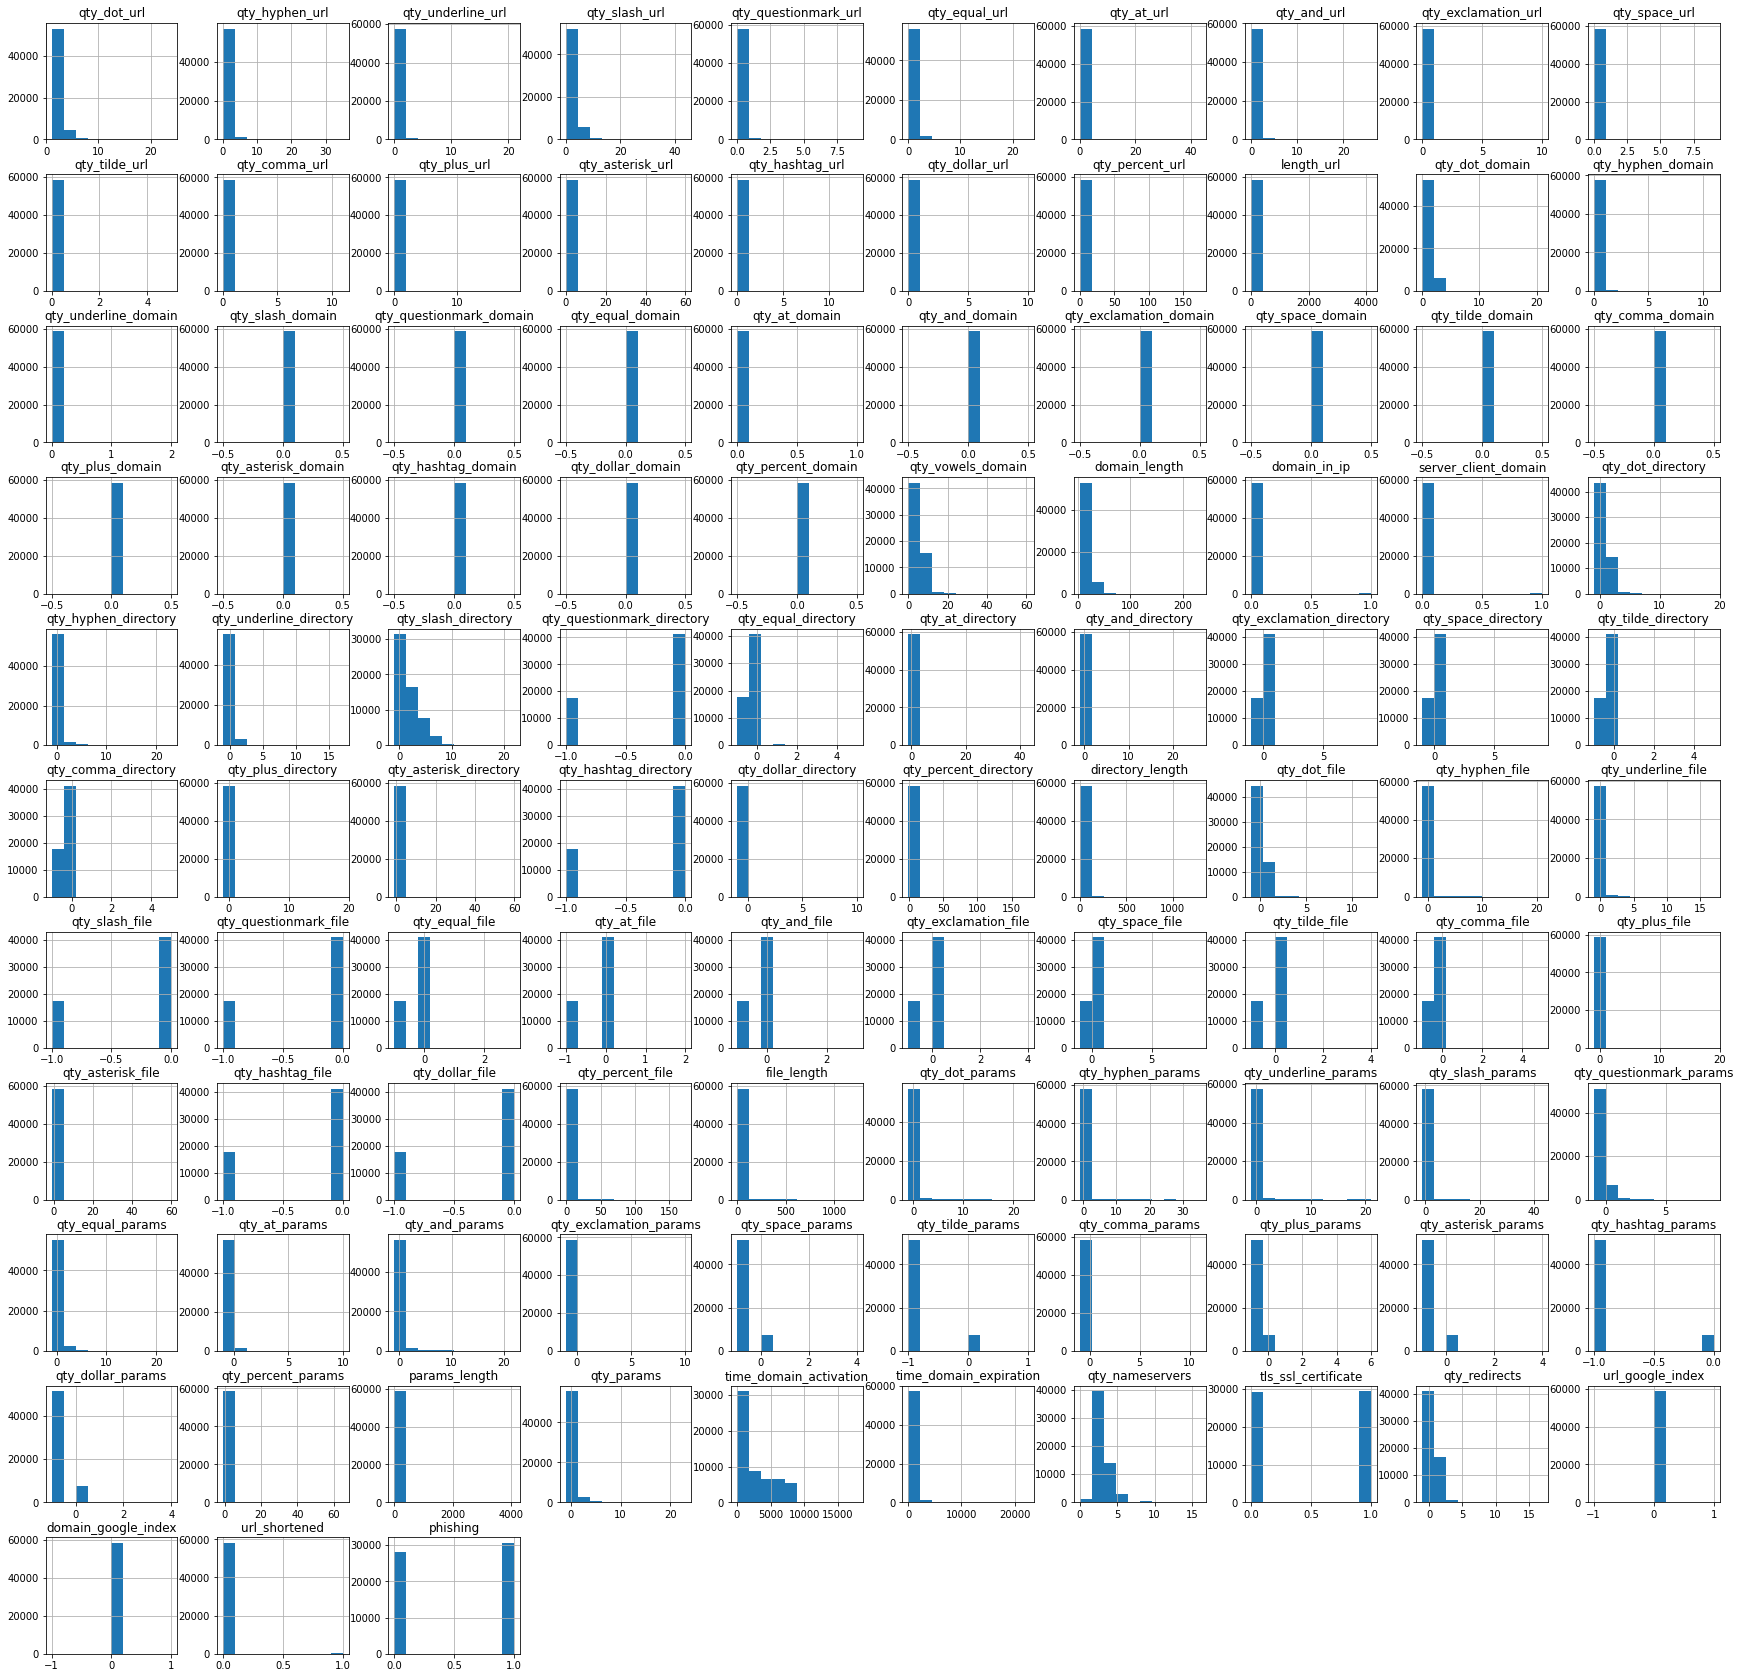

In [9]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

# Visualización de datos estadísticos

In [10]:
#VISUALIZACIÓN DE DATOS ESTADÍSTICOS DEL DATAFRAME
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,...,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,qty_params,time_domain_activation,time_domain_expiration,qty_nameservers,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,...,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.830898,-0.860670,-0.587723,-0.846193,-0.680791,-0.872692,-0.873323,-0.873357,-0.871242,-0.870969,-0.873305,-0.873442,-0.872862,-0.791559,8.482462,-0.636832,2531.939483,293.615074,2.829619,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,0.096013,0.093381,0.136331,0.370849,0.075802,0.122604,2.115804,54.712657,0.790989,0.465673,0.019802,0.0,0.0,0.0,0.004129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.714293,7.244541,0.058444,0.059307,0.932358,...,0.458425,0.461529,0.460601,0.461782,0.458945,0.460731,0.468779,0.531246,0.457615,0.457615,1.713954,16.358671,1.193137,0.771199,0.797698,0.663899,0.386856,1.345035,0.432952,1.235146,0.339404,0.333280,0.332832,0.347086,0.347966,0.333350,0.332480,0.336390,1.285886,42.598270,1.137735,2799.792419,562.400108,1.377018,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.000000,0.000000,0.000000,-1.000000,...,-1.0

> Variable objetivo: "phishing"


|          Feature           |                   Description                      |
|----------------------------|----------------------------------------------------|
| qty_dot_url                | contador de (.) en URL                                   |
| qty_hyphen_url             | contador de (-) en URL                                   |
| qty_underline_url          | contador de (_) en URL                                   |
| qty_slash_url              | contador de (/) en URL                                   |
| qty_questionmark_url       | contador de (?) en URL                                   |
| qty_equal_url              | contador de (=) en URL                                   |
| qty_at_url                 | contador de (@) en URL                                   |
| qty_and_url                | contador de (&) en URL                                   |
| qty_exclamation_url        | contador de (!) en URL                                   |
| qty_space_url	             | contador de ( ) en URL                                   |
| qty_tilde_url	             | contador de (~) en URL                                   |
| qty_comma_url	             | contador de (,) en URL                                   |
| qty_plus_url	             | contador de (+) en URL                                   |
| qty_asterisk_url	         | contador de (*) en URL                                   |
| qty_hashtag_url	         | contador de (#) en URL                                   |
| qty_dollar_url	         | contador de (símbolo de dólar) en URL                                   |
| qty_percent_url	         | contador de (%) en URL                                   |
| qty_tld_url	             | top-level-domain length                            |
| length_url	             | URL length                                         |
| qty_dot_domain	         | contador de (.) en el dominio                                |
| qty_hyphen_domain	         | contador de (-) en el dominio                                |
| qty_underline_domain       | contador de (_) en el dominio                                |
| qty_slash_domain	         | contador de (/) en el dominio                                |
| qty_questionmark_domain    | contador de (?) en el dominio                                |
| qty_equal_domain           | contador de (=) en el dominio                                |
| qty_at_domain              | contador de (@) en el dominio                                |
| qty_and_domain             | contador de (&) en el dominio                                |
| qty_exclamation_domain     | contador de (!) en el dominio                                |
| qty_space_domain           | contador de ( ) en el dominio                                |
| qty_tilde_domain           | contador de (~) en el dominio                                |
| qty_comma_domain           | contador de (,) en el dominio                                |
| qty_plus_domain            | contador de (+) en el dominio                                |
| qty_asterisk_domain        | contador de (*) en el dominio                                |
| qty_hashtag_domain         | contador de (#) en el dominio                                |
| qty_dollar_domain          | contador de (símbolo de dólar) en el dominio                                |
| qty_percent_domain         | contador de (%) en el dominio                                |
| qty_vowels_domain          | count vowels en el dominio                             |
| domain_length              | domain length                                      |
| domain_in_ip               | Dominio de URL en formato de dirección IP                    |
| server_client_domain       | el dominio contiene las palabras clave "server" o "client"  |
| qty_dot_directory	         | contador de (.) en directorio                             |
| qty_hyphen_directory       | contador de (-) en directorio                             |
| qty_underline_directory    | contador de (_) en directorio                             |
| qty_slash_directory        | contador de (/) en directorio                             |
| qty_questionmark_directory | contador de (?) en directorio                             |
| qty_equal_directory        | contador de (=) en directorio                             |
| qty_at_directory           | contador de (@) en directorio                             |
| qty_and_directory          | contador de (&) en directorio                             |
| qty_exclamation_directory	 | contador de (!) en directorio                             |
| qty_space_directory        | contador de ( ) en directorio                             |
| qty_tilde_directory        | contador de (~) en directorio                             |
| qty_comma_directory        | contador de (,) en directorio                             |
| qty_plus_directory         | contador de (+) en directorio                             |
| qty_asterisk_directory     | contador de (*) en directorio                             |
| qty_hashtag_directory      | contador de (#) en directorio                             |
| qty_dollar_directory       | contador de (símbolo de dólar) en directorio                             |
| qty_percent_directory      | contador de (%) en directorio                             |
| directory_length           | directory length                                   |
| qty_dot_file               | contador de (.) en archivo                                  |
| qty_hyphen_file            | contador de (-) en archivo                                  |
| qty_underline_file         | contador de (_) en archivo                                  |
| qty_slash_file             | contador de (/) en archivo                                  |
| qty_questionmark_file      | contador de (?) en archivo                                  |
| qty_equal_file             | contador de (=) en archivo                                  |
| qty_at_file                | contador de (@) en archivo                                  |
| qty_and_file               | contador de (&) en archivo                                  |
| qty_exclamation_file       | contador de (!) en archivo                                  |
| qty_space_file             | contador de ( ) en archivo                                  |
| qty_tilde_file             | contador de (~) en archivo                                  |
| qty_comma_file             | contador de (,) en archivo                                  |
| qty_plus_file	             | contador de (+) en archivo                                  |
| qty_asterisk_file          | contador de (*) en archivo                                  |
| qty_hashtag_file           | contador de (#) en archivo                                  |
| qty_dollar_file            | contador de (símbolo de dólar) en archivo                                  |
| qty_percent_file           | contador de (%) en archivo                                  |
| file_length                | longitud de archivo                                        |
| qty_dot_params             | contador de (.) en parámetros                            |
| qty_hyphen_params          | contador de (-) en parámetros                            |
| qty_underline_params       | contador de (_) en parámetros                            |
| qty_slash_params           | contador de (/) en parámetros                            |
| qty_questionmark_params    | contador de (?) en parámetros                            |
| qty_equal_params           | contador de (=) en parámetros                            |
| qty_at_params              | contador de (@) en parámetros                            |
| qty_and_params             | contador de (&) en parámetros                            |
| qty_exclamation_params     | contador de (!) en parámetros                            |
| qty_space_params           | contador de ( ) en parámetros                            |
| qty_tilde_params           | contador de (~) en parámetros                            |
| qty_comma_params           | contador de (,) en parámetros                            |
| qty_plus_params            | contador de (+) en parámetros                            |
| qty_asterisk_params        | contador de (*) en parámetros                            |
| qty_hashtag_params         | contador de (#) en parámetros                            |
| qty_dollar_params          | contador de (símbolo de dólar) en parámetros                            |
| qty_percent_params         | contador de (%) en parámetros                            |
| params_length              | longitud de parametros                                  |
| qty_params                 | número de parametros                               |
| time_domain_activation     | tiempo (en días) de activacion de dominio                |
| time_domain_expiration     | tiempo (en días) de expiracion de dominio                |
| qty_nameservers            | number of resolved name servers (NameServers - NS) |
| tls_ssl_certificate        | Certificado TLS / SSL valido                        |
| qty_redirects              | numero de redirecciones                               |
| url_google_index           | checkeo si URL está indexada en Google                  |
| domain_google_index        | checkeo si dominio está indexado en Google               |
| url_shortened              | checkeo si URL está acortado                          |
                            |

## Cantidad de datos nulos por columna

In [11]:
#Conteo de valores
dataset.count() 

qty_dot_url             58645
qty_hyphen_url          58645
qty_underline_url       58645
qty_slash_url           58645
qty_questionmark_url    58645
                        ...  
qty_redirects           58645
url_google_index        58645
domain_google_index     58645
url_shortened           58645
phishing                58645
Length: 103, dtype: int64

In [12]:
# Encontrar valores vacíos
dataset.isnull().sum(axis=0) 

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 103, dtype: int64

# Datos de entrenamiento y testing



- Subdivisiones del dataset balanceado: Conjunto de entrenamiento (train) y conjunto de pruebas (test).
- Para entrenar nuestro modelo de Machine Learning y poder saber si está funcionando bien.

In [13]:
columns = dataset.columns.tolist() #COLUMNAS DE DATASET CONVERTIDAS EN UNA LISTA
columns = [x for x in columns if x not in ["phishing"]]  #DEFINIENDO UNA LIST COMPREHENSION

X = dataset[columns] #VARIABLES REGRESORAS
Y = pd.DataFrame(dataset['phishing'])

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    # stratify=Y, #DATOS PROPORCIONALES EN Y
                                                    test_size=.2, #PORCENTAJE PARA TESTING
                                                    random_state=22) #FIJAR SEMILLA PARA OBTENER EL MISMO RESULTADO AL VOLVER A EJECUTAR

# Estandarización de datos

Estandarizar un conjunto de datos implica volver a escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1.

In [14]:
scaler_n = StandardScaler()
X_train_n = pd.DataFrame(scaler_n.fit_transform(X_train), columns=X_train.columns)
X_test_n = pd.DataFrame(scaler_n.fit_transform(X_test), columns=X_test.columns)

# Modelos para la clasificación

In [15]:
# ALMACENAMIENTO DE RESULTADOS POR MODELO
dictionary_models = {}
kfold=KFold(n_splits=10)

## Logistic Regression Classification


- La regresión logística usa comúnmente para estimar la probabilidad de que una instancia pertenezca a una clase en particular. 

In [16]:
# Logistic Regression Classification
model_LR=LogisticRegression(solver='lbfgs', max_iter=2500)
result_LR=cross_val_score(model_LR, X_train_n, y_train, cv=kfold)
dictionary_models.update({"Logistic Regression Classification": result_LR})

In [17]:
print(f"Accuracy {result_LR.mean()*100.0:,.2f}%  ({result_LR.std()*100.0:,.2f}) %")

Accuracy 89.60%  (0.48) %


## Gaussian Naive Bayes Classification

- Se asume que las variables predictoras son independientes entre sí. 
- Se proporciona una forma de calcular la probabilidad ‘posterior’ de que ocurra un cierto evento, dadas algunas probabilidades de eventos ‘anteriores’.

In [18]:
# Gaussian Naive Bayes Classification
model_GNB=GaussianNB()
result_GNB=cross_val_score(model_GNB, X_train_n, y_train, cv=kfold)
result_std_GNB = result_GNB.std()
result_mean_GNB = result_GNB.mean()
dictionary_models.update({"Gaussian Naive Bayes Classification": result_GNB})

In [19]:
print(f"Accuracy {result_mean_GNB*100.0:,.2f}%  ({result_std_GNB*100.0:,.2f}) %")

Accuracy 61.10%  (0.73) %


## K-Nearest Neighbors Classification

- Se realiza un agrupamiento de datos por similitud (clustering de datos) y se traza una línea que separa los dos grupos de datos.

- Se clasifica por un voto de similitud de sus vecinos, con el objetivo de ser asignado a la clase más común entre sus vecinos k más cercanos.



In [20]:
# KNN Classification
model_KNC=KNeighborsClassifier(n_neighbors=9, algorithm="kd_tree")
result_KNC=cross_val_score(model_KNC, X_train_n, y_train, cv=kfold)
result_std_KNC = result_KNC.std()
result_mean_KNC = result_KNC.mean()
dictionary_models.update({"KNN Classification": result_KNC})

In [21]:
print(f"Accuracy {result_mean_KNC*100.0:,.2f}%  ({result_std_KNC*100.0:,.2f}) %")

Accuracy 92.58%  (0.40) %


## Support Vector Machine Classification

- Las máquinas de vectores de soporte encuentran la separación óptima posible entre las clases en estudio.
- Definen el margen de separación del hiperplano.
- Cuando las clases no sean posibles de separar linealmente, serán agregadas las dimensiones necesarias para lograr la separación.

In [22]:
# SVM Classification
model_SVM=SVC(gamma="auto", C=2.0, kernel="rbf")
result_SVM=cross_val_score(model_SVM, X_train_n, y_train, cv=kfold)
result_std_SVM = result_SVM.std()
result_mean_SVM = result_SVM.mean()
dictionary_models.update({"SVM Classification": result_SVM})

In [23]:
print(f"Accuracy {result_mean_SVM*100.0:,.2f}%  ({result_std_SVM*100.0:,.2f}) %")

Accuracy 90.81%  (0.45) %


## Decision Tree Classification

- Mapa de los posibles resultados de una serie de decisiones relacionadas.
- Eligen el mejor atributo para realizar sus nodos principales dependiendo la correlación que tengan con la variable dependiente.
- Tienden a ajustarse muy bien los datos de entrenamiento, por lo que puede ocurrir un sobreajuste, perjudicando la generalización del modelo.

In [24]:
# Decision Tree Classification
model_DTC=DecisionTreeClassifier(criterion="entropy")
result_DTC=cross_val_score(model_DTC, X_train_n, y_train, cv=kfold)
result_std_DTC = result_DTC.std()
result_mean_DTC = result_DTC.mean()
dictionary_models.update({"Decision Tree Classification": result_DTC})

In [25]:
print(f"Accuracy {result_mean_DTC*100.0:,.2f}%  ({result_std_DTC*100.0:,.2f}) %")

Accuracy 92.43%  (0.34) %


## Random Forest Classification

- Conjunto de clasificadores de árbol de decisión aplicados a varias submuestras de datos de entrada.
- Hace uso del promedio para mejorar la precisión predictiva.
- Dividen los nodos con el criterio de la más óptima combinación de características. 

In [26]:
# Random Forest Classification
model_RFC=RandomForestClassifier(n_estimators=100, max_features=3)
results_RFC=cross_val_score(model_RFC, X_train_n, y_train, cv=kfold)
results_std_RFC = results_RFC.std()
results_mean_RFC = results_RFC.mean()
dictionary_models.update({"Random Forest Classification": results_RFC})

In [33]:
print(f"Accuracy {results_mean_RFC*100.0:,.2f}%  ({results_std_RFC*100.0:,.2f}) %")
# Accuracy 87.75%  (0.46) %
# Accuracy 87.62%  (0.43) %
# Accuracy 87.57%  (0.45) % 0.3

Accuracy 94.56%  (0.25) %


## Extra Trees Classification

- Aplican el concepto de bosques aleatorios.
- Seleccionan puntos de corte aleatorios para la división de nodos.

In [28]:
# Extra Trees Classification
model_ETC=ExtraTreesClassifier(n_estimators=100, max_features=3)
results_ETC=cross_val_score(model_ETC, X_train_n, y_train, cv=kfold)
results_std_ETC = results_ETC.std()
results_mean_ETC = results_ETC.mean()
dictionary_models.update({"Extra Trees Classification": results_ETC})

In [29]:
print(f"Accuracy {results_mean_ETC*100.0:,.2f}%  ({results_std_ETC*100.0:,.2f}) %")
# Accuracy 87.30%  (0.38) %


Accuracy 94.27%  (0.28) %


## Comparación de precisión entre modelos

In [34]:
for name,model in dictionary_models.items():
  print(f"{name}: Accuracy {model.mean()*100.0:,.2f}%  ({model.std()*100.0:,.2f})%")

Logistic Regression Classification: Accuracy 89.60%  (0.48)%
Gaussian Naive Bayes Classification: Accuracy 61.10%  (0.73)%
KNN Classification: Accuracy 92.58%  (0.40)%
SVM Classification: Accuracy 90.81%  (0.45)%
Decision Tree Classification: Accuracy 92.43%  (0.34)%
Random Forest Classification: Accuracy 94.56%  (0.25)%
Extra Trees Classification: Accuracy 94.27%  (0.28)%


# Comparación de precisión


- Logistic Regression Classification: Accuracy 83.47%  (0.60)%
- Gaussian Naive Bayes Classification: Accuracy 79.37%  (0.72)%
- KNN Classification: Accuracy 86.81%  (0.53)%
- SVM Classification: Accuracy 83.69%  (0.61)%
- Decision Tree Classification: Accuracy 86.41%  (0.41)%
- Random Forest Classification: Accuracy 87.62%  (0.43)%
- Extra Trees Classification: Accuracy 87.30%  (0.38)%

In [83]:
param_grid = {
    'n_estimators': np.array([100,250,350,450,550]),
    'criterion' :['gini', 'entropy'],
    'max_features': np.array([2,3,4,5,6,7,8,9,10])
}
model_RF = RandomForestClassifier() #CREANDO EN MODELO RANDOM FOREST

CV_RFC = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv= 5)
CV_RFC.fit(X_train_n, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [85]:
print(f"Mejor Accuracy: {CV_RFC.best_score_.mean()*100.0:,.2f}%")
print(f"Mejor n_estimators: {CV_RFC.best_estimator_.n_estimators}")
print(f"Mejor criterion: {CV_RFC.best_estimator_.criterion}")
print(f"Mejor min_samples_split: {CV_RFC.best_estimator_.min_samples_split}")
print(f"Mejor max_features: {CV_RFC.best_estimator_.max_features}")
print(f"Mejor bootstrap: {CV_RFC.best_estimator_.bootstrap}")

Mejor Accuracy: 94.62%
Mejor n_estimators: 350
Mejor criterion: entropy
Mejor min_samples_split: 2
Mejor max_features: 10
Mejor bootstrap: True


# Gestión del flujo de trabajo

- Automatizaremos el flujo de trabajo usando Pipelines.
- Almacenaremos varias fases de un proceso secuencial, estableciendo tributos y parámetros sin perder datos anteriores.
- Utilizaremos “joblib” para guardar nuestro modelo de trabajo, así también podremos cargarlo para agilizar el proceso posterior.

In [35]:
#ASIGNACIÓN DE NOMBRE DEL MODELO GUARDADO
filename = 'model_RFC.sav'

In [36]:
#GUARDANDO EL MODELO EN MEMORIA(DRIVE)
estimators = []
estimators.append(('RF', RandomForestClassifier(n_estimators=350, criterion='gini', max_features=9)))
model = Pipeline(estimators)
model.fit(X_train_n, y_train)
joblib.dump(model, filename)

['model_RFC.sav']

In [37]:
#CARGA DEL MODELO
RFC_sav = joblib.load(filename)

In [38]:
#PREDICCIÓN CON EL CONJUNTO DE TEST
result_RFC_sav = RFC_sav.score(X_test_n, y_test)
print(f'Accuracy: {result_RFC_sav.mean()*100.0:,.2f}%')

Accuracy: 94.99%


# Matriz de confusión

In [39]:
predictions = RFC_sav.predict(X_test_n) #PREDICCIÓN CON EL MODELO FINAL
confusion_matrix_result = confusion_matrix(y_test, predictions) #GENERANDO LA MATRIZ DE CONFUSIÓN

In [40]:
print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))

0.9498678489214767


In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
    La normalización se puede aplicar configurando `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plt.show()

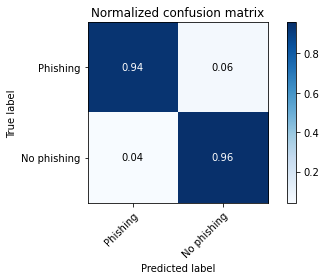

In [42]:
np.set_printoptions(precision=2)
class_names = np.array(['Phishing','No phishing'])
plot_confusion_matrix(y_test, predictions,class_names,normalize=True,title='Normalized confusion matrix')

# Predicción con datos reales

Para finalizar implementaremos un algoritmo para extraer las características (variables predictoras) de URL's reales para posteriormente evaluar la precisión de nuestro modelo de clasificación final.

In [49]:
#EXTRACCIÓN DE CARACTERÍSTICAS
def get_file_in_url(url_directory):
  directory_split = url_directory.split("/")
  directory_split_len = len(url_directory.split("/"))
  directory_position_last = directory_split_len - 1
  directory_split[directory_position_last]
  return directory_split[directory_position_last]

def get_counts(data, counts):
  signs = {
    "qty_slash": "/",
    "qty_dot": ".",
    "qty_hyphen": "-",
    "qty_underline": "_",
    "qty_questionmark": "?",
    "qty_equal": "=",
    "qty_at": "@",
    "qty_and": "&",
    "qty_exclamation": "!",
    "qty_space": " ",
    "qty_tilde": "~",
    "qty_comma": ",",
    "qty_plus": "+",
    "qty_asterisk": "*",
    "qty_hashtag": "#",
    "qty_dollar": "$",
    "qty_percent": "%"
  }

  for name, sign in signs.items():
    counts.update({name: data.count(sign)})

  counts.update({"qty_vowels": sum(c in {"a", "A", "e", "E", "i", "I", "o", "O", "u", "U"} for c in data)})
  return counts

def process_real_urls(url):
  if not re.match(r"^https?", url):
      url = "http://" + url
  try:
      response = requests.get(url)
  except:
      response = ""

  if (response != ""):
      qty_redirects = len(response.history)
  else:
      qty_redirects = -1

  try:
    if response.status_code == 200:
      tls_ssl_certificate = 1
    else:
        tls_ssl_certificate = 0
  except:
    tls_ssl_certificate = 0
 

  shortened = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                        'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                        'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                        'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                        'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                        'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                        'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',
                        url)
  if shortened:
      url_shortened = 1
  else:
      url_shortened = 2

  parsed = urlparse(url)
  url_domain = parsed.netloc
  try:
      ipaddress.ip_address(url_domain)
      domain_in_ip = 1
  except:
      domain_in_ip = 0

  search_url_google = search(url, 10)
  if search_url_google:
      url_google_index = 1
  else:
      url_google_index = 0

  search_domain_google = search(url_domain, 10)

  if search_domain_google:
      domain_google_index = 1
  else:
      domain_google_index = 0

  if 'server' or 'client' in url_domain:
      server_client_domain = 1
  else:
      server_client_domain = 0
      
  url_directory = parsed.path
  url_file = get_file_in_url(url_directory)
  url_params = parsed.query
  try:
      qty_params = url_params.count('&') + 1
  except:
      qty_params = - 1

  # CONTEO
  counts = {}
  counts_url = get_counts(url, counts)
  counts_url.update({"qty_redirects": qty_redirects})
  counts_params = get_counts(url_params, counts)
  counts_params.update({"qty_params": qty_params})

  url_original_data = {"counts": counts_url, "lenght": len(url), "url_shortened": url_shortened,
                        "url_google_index": url_google_index, "tls_ssl_certificate": tls_ssl_certificate}
  url_domain_data = {"counts": get_counts(url_domain, counts), "lenght": len(url_domain),
                      "domain_in_ip": domain_in_ip, "domain_google_index":domain_google_index,
                      "server_client_domain": server_client_domain}
  url_directory_data = {"counts": get_counts(url_directory, counts), "lenght": len(url_directory)}
  url_file_data = {"counts": get_counts(url_file, counts), "lenght": len(url_file)}
  url_params_data = {"counts": get_counts(url_params, counts), "lenght": len(url_params)}
  return {"url_original_data": url_original_data, "url_domain_data": url_domain_data,
          "url_directory_data": url_directory_data,
          "url_file_data": url_file_data,
          "url_params_data": url_params_data}

def process_whois(url):
    today = time.strftime('%Y-%m-%d')
    today = datetime.strptime(today, '%Y-%m-%d')
    whois_url = whois.whois(url)
    try:
        url_creation_date = whois_url.creation_date
        creation_date = url_creation_date[0]
        time_domain_activation = abs((creation_date - today).days)
    except:
        time_domain_activation = -1

    try:
        url_expiration_date = whois_url.expiration_date
        expiration_date = url_expiration_date[0]
        time_domain_expiration = abs((expiration_date - today).days)
    except:
        time_domain_expiration = -1

    try:
        if(whois_url.name_servers):
            qty_nameservers = len(whois_url.name_servers)
        else:
            qty_nameservers = 0
    except:
        qty_nameservers = -1

    data_whois = {
        "time_domain_activation": time_domain_activation,
        "time_domain_expiration": time_domain_expiration,
        "qty_nameservers": qty_nameservers,
    }

    return data_whois


def set_list_urls(result_counts, dataset_urls, data_whois):
    url_original_data = result_counts['url_original_data']

    url_original_counts = url_original_data['counts']
    url_original_lenght = url_original_data['lenght']

    url_domain_data = result_counts['url_domain_data']
    url_domain_counts = url_domain_data['counts']
    url_domain_lenght = url_domain_data['lenght']

    url_directory_data = result_counts['url_directory_data']
    url_directory_counts = url_directory_data['counts']
    url_directory_lenght = url_directory_data['lenght']

    url_file_data = result_counts['url_file_data']
    url_file_counts = url_file_data['counts']
    url_file_lenght = url_file_data['lenght']

    url_params_data = result_counts['url_params_data']
    url_params_counts = url_params_data['counts']
    url_params_lenght = url_params_data['lenght']

    dataset_urls.append([
        url_original_counts['qty_dot'],
        url_original_counts['qty_hyphen'],
        url_original_counts['qty_underline'],
        url_original_counts['qty_slash'],
        url_original_counts['qty_questionmark'],
        url_original_counts['qty_equal'],
        url_original_counts['qty_at'],
        url_original_counts['qty_and'],
        url_original_counts['qty_exclamation'],
        url_original_counts['qty_space'],
        url_original_counts['qty_tilde'],
        url_original_counts['qty_comma'],
        url_original_counts['qty_plus'],
        url_original_counts['qty_asterisk'],
        url_original_counts['qty_hashtag'],
        url_original_counts['qty_dollar'],
        url_original_counts['qty_percent'],
        url_original_counts['qty_vowels'],
        url_original_lenght,

        url_domain_counts['qty_dot'],  # 20
        url_domain_counts['qty_hyphen'],
        url_domain_counts['qty_underline'],
        url_domain_counts['qty_slash'],
        url_domain_counts['qty_questionmark'],
        url_domain_counts['qty_equal'],
        url_domain_counts['qty_at'],
        url_domain_counts['qty_and'],
        url_domain_counts['qty_exclamation'],
        url_domain_counts['qty_space'],
        url_domain_counts['qty_tilde'],  # 30
        url_domain_counts['qty_comma'],
        url_domain_counts['qty_plus'],
        url_domain_counts['qty_asterisk'],
        url_domain_counts['qty_hashtag'],
        url_domain_counts['qty_dollar'],
        url_domain_counts['qty_percent'],
        url_domain_lenght,
        url_domain_data['domain_in_ip'],
        url_domain_data['server_client_domain'],

        url_directory_counts['qty_dot'],
        url_directory_counts['qty_hyphen'],# 40
        url_directory_counts['qty_underline'],
        url_directory_counts['qty_slash'],
        url_directory_counts['qty_questionmark'],
        url_directory_counts['qty_equal'],
        url_directory_counts['qty_at'],
        url_directory_counts['qty_and'],
        url_directory_counts['qty_exclamation'],
        url_directory_counts['qty_space'],
        url_directory_counts['qty_tilde'],
        url_directory_counts['qty_comma'],# 50
        url_directory_counts['qty_plus'],
        url_directory_counts['qty_asterisk'],
        url_directory_counts['qty_hashtag'],
        url_directory_counts['qty_dollar'],
        url_directory_counts['qty_percent'],
        url_directory_lenght,

        url_file_counts['qty_dot'],
        url_file_counts['qty_hyphen'],
        url_file_counts['qty_underline'],
        url_file_counts['qty_slash'], # 60
        url_file_counts['qty_questionmark'],
        url_file_counts['qty_equal'],
        url_file_counts['qty_at'],
        url_file_counts['qty_and'],
        url_file_counts['qty_exclamation'],
        url_file_counts['qty_space'],
        url_file_counts['qty_tilde'],
        url_file_counts['qty_comma'],
        url_file_counts['qty_plus'],
        url_file_counts['qty_asterisk'], # 70
        url_file_counts['qty_hashtag'],
        url_file_counts['qty_dollar'],
        url_file_counts['qty_percent'],
        url_file_lenght,

        url_params_counts['qty_dot'],
        url_params_counts['qty_hyphen'],
        url_params_counts['qty_underline'],
        url_params_counts['qty_slash'],
        url_params_counts['qty_questionmark'],
        url_params_counts['qty_equal'], # 80
        url_params_counts['qty_at'],
        url_params_counts['qty_and'],
        url_params_counts['qty_exclamation'],
        url_params_counts['qty_space'],
        url_params_counts['qty_tilde'],
        url_params_counts['qty_comma'],
        url_params_counts['qty_plus'],
        url_params_counts['qty_asterisk'],
        url_params_counts['qty_hashtag'],
        url_params_counts['qty_dollar'],  # 90
        url_params_counts['qty_percent'],
        url_params_lenght,
        url_params_counts['qty_params'],
        data_whois['time_domain_activation'],
        data_whois['time_domain_expiration'],
        data_whois['qty_nameservers'],
        url_original_data['tls_ssl_certificate'],

        url_original_counts['qty_redirects'],
        url_original_data['url_google_index'],
        url_domain_data['domain_google_index'],
        url_original_data['url_shortened'], #99
    ])
    return dataset_urls


In [50]:
#ITERACIÓN DE LA LISTA DE URL's
def iteration_urls(urls):
  dataset_urls = []
  for url in urls:
    result_counts = process_real_urls(url)
    data_whois = process_whois(url)
    dataset_urls = set_list_urls(result_counts, dataset_urls, data_whois)
  return dataset_urls;

In [78]:
#INGRESO DE URLS A CLASIFICAR
urls = [
        "https://www.youtube.com/watch?v=mWWD5pYRjD4",
        "https://bookdown.org/content/2274/metodos-de-clasificacion.html",
        "http://sparkasse-musterstadt.if-einblick.de/fi/home/produkte/banking-und-software/online-banking/banking-mit-pushtan.html?q=push&mdidianlass=&mdidiansprache=&n=true&stref=search",
        "https://www.clima.com/peru",
        ]

dataset_urls = iteration_urls(urls)

In [79]:
#GENERACIÓN DE DATAFRAME - PREDICCIÓN DE DATOS
fit_dataset_urls = scaler_n.fit_transform(dataset_urls) #NORMALIZANDO CARACTERÍSTICAS
predictions = RFC_sav.predict(fit_dataset_urls) #GENERANDO PREDICCIÓN

characteristics_df = pd.DataFrame(fit_dataset_urls, columns=columns) #DATAFRAME DE CARACTERÍSTICAS EN URL
predictions_df = pd.DataFrame(predictions, columns=['phishing']) #DATAFRAME DE LA PREDICCIÓN

predicted_output = pd.concat([characteristics_df, predictions_df], axis=1) #DATAFRAME CARACTERÍSTICAS+PREDICCIÓN

## Dataframe - Resultados de clasificación con datos reales

In [81]:
predicted_output #MOSTRAR RESULTADOS DE PREDICCIÓN - CARACTERÍSTICAS+PREDICCIÓN

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,...,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,qty_params,time_domain_activation,time_domain_expiration,qty_nameservers,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0.0,0.0,0.0,0.0,0.0,-0.242536,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.577350,-0.579910,0.0,0.0,0.0,0.0,0.0,-0.242536,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.405096,0.0,0.0,0.0,...,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.941979,0.0,0.0,0.0,0.0,0.0,-0.242536,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.177210,-0.577350,1.732051,1.732051,0.577350,0.0,-0.577350,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.577350,-0.241276,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.708918,0.0,0.0,0.0,...,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.211116,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.753142,-0.577350,-0.577350,-0.577350,0.577350,0.0,-0.577350,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.697749,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.732051,1.688935,0.0,0.0,0.0,0.0,0.0,1.697749,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.721657,0.0,0.0,0.0,...,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762554,0.0,0.0,0.0,0.0,0.0,1.697749,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.683494,1.732051,-0.577350,-0.577350,-1.732051,0.0,1.732051,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.577350,-0.867749,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.607644,0.0,0.0,0.0,...,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.031691,0.0,0.0,0.0,0.0,0.0,-0.727607,0.0,-0.577350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.753142,-0.577350,-0.577350,-0.577350,0.577350,0.0,-0.577350,0.0,0.0,0.0,0


In [80]:
predictions_df

,phishing
0,0
1,1
2,1
3,0


## Exportar resultados de predicción con datos reales

In [ ]:
#EXPORTAR CSV CON RESULTADOS
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
name_dowload = "prediction_"+dt_string #NOMBRE PARA EXPORTAR CSV - CARACTERÍSTICAS+PREDICCIÓN
predicted_output.to_csv(name_dowload+".csv") 
files.download(name_dowload+".csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>